In [4]:
import torch
from torchvision.utils import save_image
from matplotlib import pyplot as plt
import numpy as np
import os
from helpers import st_gumbel_softmax
from torch.nn import functional

In [3]:
def heaviside(x):
    ones = torch.ones_like(x)
    zeros = torch.zeros_like(x)
    x_hard = torch.where(x >= 0, ones, zeros)

    return x_hard

def tanh(x):
    return (np.exp(2*x) -1 ) / (np.exp(2*x) + 1)

def calc_conv_output_size(img_size, kernel_size, stride, padding, dilation):
    return (img_size + 2 * padding - dilation * (kernel_size - 1) - 1) / stride + 1

In [96]:
z = torch.rand(20, 1)

In [97]:
z

tensor([[ 0.4403],
        [ 0.5795],
        [ 0.2468],
        [ 0.6102],
        [ 0.4058],
        [ 0.9021],
        [ 0.8493],
        [ 0.4976],
        [ 0.2953],
        [ 0.3620],
        [ 0.2877],
        [ 0.8805],
        [ 0.6416],
        [ 0.3273],
        [ 0.0294],
        [ 0.5144],
        [ 0.8952],
        [ 0.4498],
        [ 0.7401],
        [ 0.0966]])

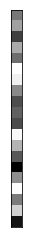

In [98]:
fig, ax = plt.subplots(1)
ax.imshow(z, cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('random_vector.png', bbox_inches='tight', pad_inches=0)

In [91]:
mazes = torch.load('../data/mazes/60000.8x8.data.tar')
maze = mazes[0]

In [89]:
# maze = maze + torch.randn(8,8) * 0.1

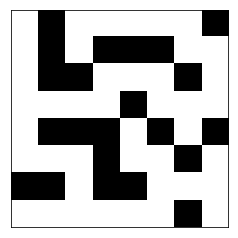

In [92]:
fig, ax = plt.subplots(1)
ax.imshow(maze, cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('discrete_maze.png', bbox_inches='tight', pad_inches=0)

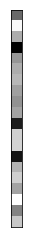

In [104]:
z = torch.randn(20, 1)
fig, ax = plt.subplots(1)
ax.imshow(z, cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('random_gauss_vector.png', bbox_inches='tight', pad_inches=0)

In [105]:
z

tensor([[-0.6493],
        [ 1.2962],
        [ 0.2565],
        [-2.0725],
        [-0.0414],
        [ 0.2729],
        [ 0.4053],
        [ 0.1007],
        [-0.0847],
        [ 0.1562],
        [-1.6815],
        [ 0.7326],
        [ 0.7886],
        [-1.7883],
        [ 0.3723],
        [ 0.7232],
        [ 0.1575],
        [ 1.3931],
        [-0.2972],
        [ 0.6300]])

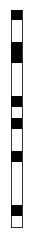

In [106]:
z = heaviside(z)
fig, ax = plt.subplots(1)
ax.imshow(z, cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('random_heaviside_vector.png', bbox_inches='tight', pad_inches=0)

In [148]:
x = np.linspace(-5, 5, 10000)
th = tanh(x)
dth = 1 - tanh(x) ** 2
hs = (heaviside(torch.tensor(x))).numpy()

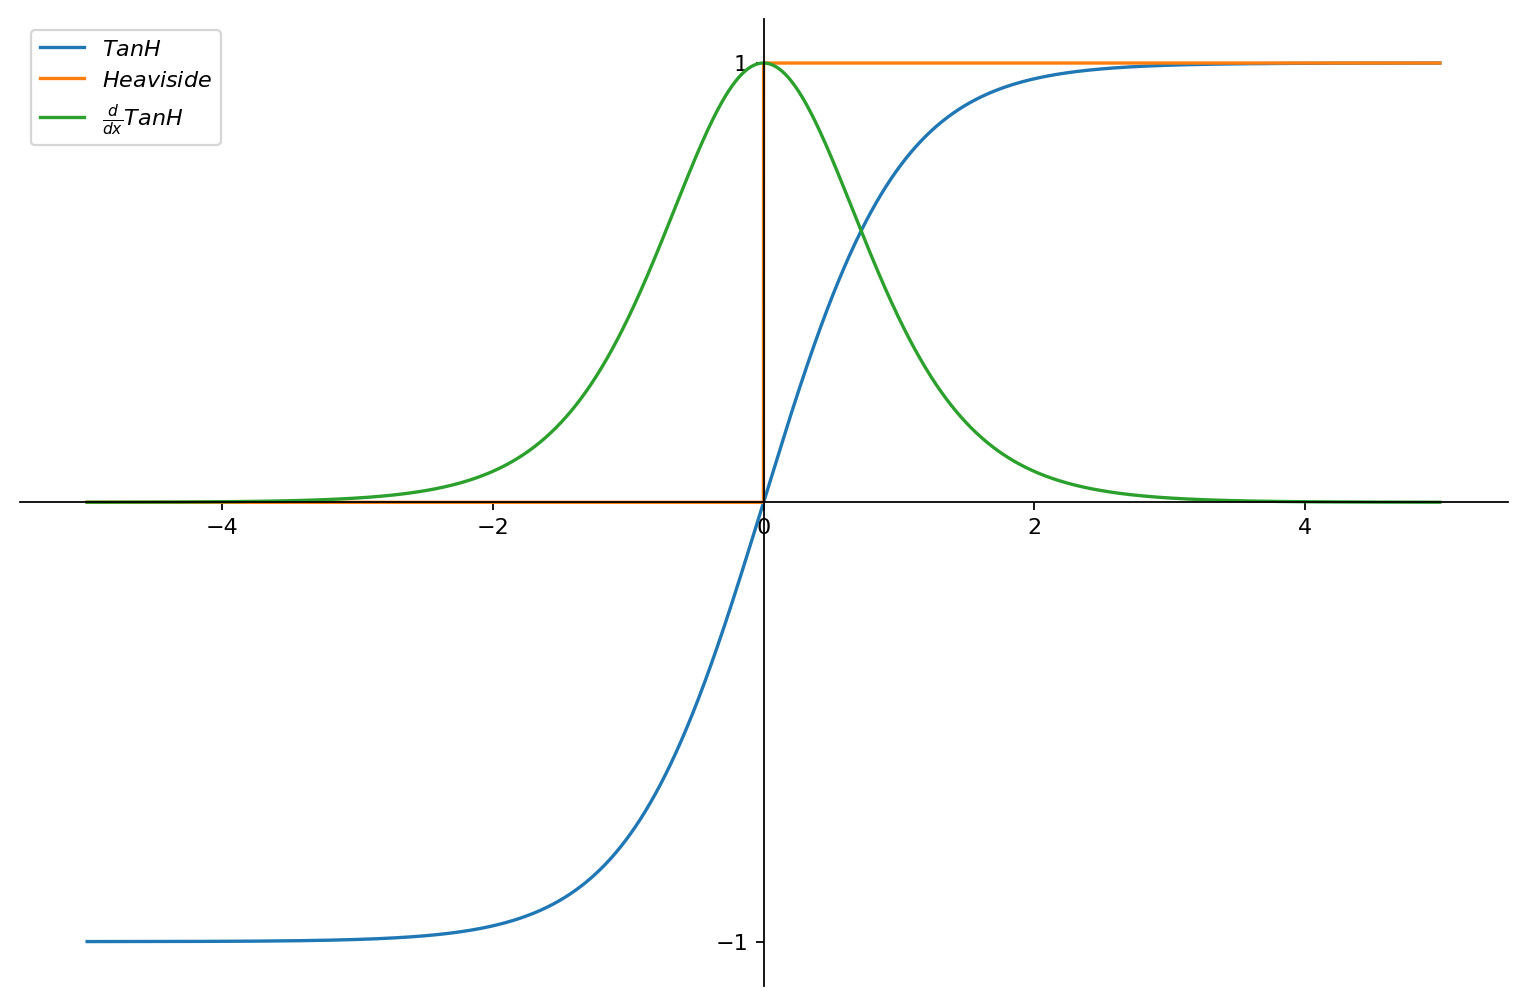

In [152]:
fig = plt.figure(dpi=160, figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.yticks([-1,1])

plt.plot(x, th, label=r'$TanH$')
plt.plot(x, hs, label=r'$Heaviside$')
plt.plot(x, dth, label=r'$\frac{d}{dx}TanH$')
plt.legend()
plt.savefig('st_estimator.png', bbox_inches='tight', pad_inches=0, transparent=True)

In [10]:
z = torch.rand(100, 2)
logits = functional.log_softmax(z, dim=-1)
gumbel_samples = st_gumbel_softmax.

tensor([[ 0.4545,  0.5455],
        [ 0.5987,  0.4013],
        [ 0.7103,  0.2897],
        [ 0.4149,  0.5851],
        [ 0.5616,  0.4384],
        [ 0.4843,  0.5157],
        [ 0.4982,  0.5018],
        [ 0.6107,  0.3893],
        [ 0.2908,  0.7092],
        [ 0.5724,  0.4276],
        [ 0.4268,  0.5732],
        [ 0.4478,  0.5522],
        [ 0.6067,  0.3933],
        [ 0.4436,  0.5564],
        [ 0.4407,  0.5593],
        [ 0.4982,  0.5018],
        [ 0.5124,  0.4876],
        [ 0.4617,  0.5383],
        [ 0.3833,  0.6167],
        [ 0.5570,  0.4430],
        [ 0.5543,  0.4457],
        [ 0.5929,  0.4071],
        [ 0.5938,  0.4062],
        [ 0.4267,  0.5733],
        [ 0.4667,  0.5333],
        [ 0.4325,  0.5675],
        [ 0.6379,  0.3621],
        [ 0.3995,  0.6005],
        [ 0.4683,  0.5317],
        [ 0.5720,  0.4280],
        [ 0.4657,  0.5343],
        [ 0.4495,  0.5505],
        [ 0.6224,  0.3776],
        [ 0.5292,  0.4708],
        [ 0.4867,  0.5133],
        [ 0.4410,  0

In [10]:
calc_conv_output_size(6, 3, 1, 1, 1)

6.0

In [9]:
calc_conv_output_size(6, 3, 2, 1, 1)

3.5

In [11]:
calc_conv_output_size(3, 3, 1, 1, 1)

3.0

In [12]:
calc_conv_output_size(3, 3, 2, 1, 1)

2.0